In [12]:
import numpy as np
import matplotlib.pyplot as plt
from curso8605 import *
import sympy as sym

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Ejercicios de la Práctica 1: Señales

### 1. Graficar las siguientes señales

>    a. $-2 \delta(n+1)$ para $-4 \leq n \leq 4$

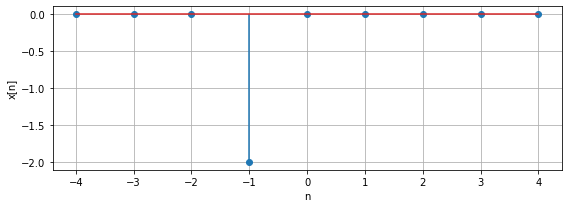

In [6]:
n_range = np.arange(-4.,5.)
x = -2 * discrete_delta(n_range + 1)
plot_discrete_simple(n_range,x,figsize=(8,3))

>  b. $2^n u(n)$ para $-3 \leq n \leq 3$

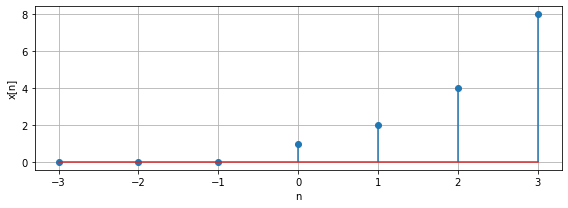

In [7]:
n_range = np.arange(-3.,4.)
x = 2.**n_range * discrete_step(n_range)
plot_discrete_simple(n_range,x,figsize=(8,3))

>    c. $2^{-n} u(n)$ para $-3 \leq n \leq 3$

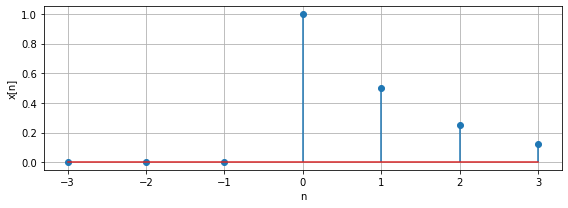

In [8]:
n_range = np.arange(-3.,4.)
x = 2.**(-n_range) * discrete_step(n_range)
plot_discrete_simple(n_range,x,figsize=(8,3))

>    d. $2^{-n} u(-n)$ para $-4 \leq n \leq 4$

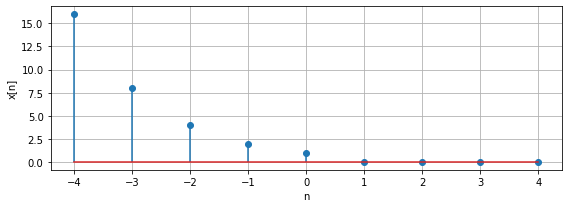

In [10]:
n_range = np.arange(-4.,5.)
x = 2.**(-n_range) * discrete_step(-n_range)
plot_discrete_simple(n_range,x,figsize=(8,3))

>    e. $\cos\left(\frac{\pi}{3}n\right) u(n-2)$ para $0 \leq n \leq 11$

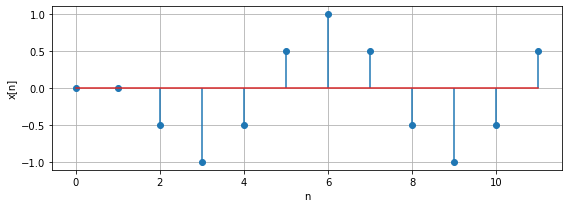

In [11]:
n_range = np.arange(0.,12.)
x = np.cos(np.pi / 3 * n_range) * discrete_step(n_range - 2)
plot_discrete_simple(n_range,x,figsize=(8,3))

### 2. Evaluar las siguientes sumas (si es posible) y expresar su respuesta en forma cartesiana (rectangular) y polar.

Para los resultados que siguen utilizamos el resultado de la serie geométrica finita:

$$
\sum_{n=a}^{b} \alpha^n = \frac{\alpha^{b+1} - \alpha^{a}}{\alpha -1}
$$

In [40]:
def symbolic_geometric_sum(alpha,a,b):
    n = sym.symbols("n")
    return sym.Sum(alpha**n, (n,a,b)).doit()

def numeric_geometric_sum(alpha,a,b):
    n_range = np.arange(a,b+1)
    return np.sum(alpha**n_range)
    
def cartesian_to_polar(z):
    return sym.Abs(z)*sym.exp(sym.I*sym.arg(z))

> a. $\sum_{n=0}^{9} e^{j\frac{\pi}{2}n}$

$$
\begin{align}
\sum_{n=0}^{9} e^{j\frac{\pi}{2}n} &= \frac{ e^{j\frac{\pi}{2}10} - e^{j\frac{\pi}{2}0} }{e^{j\frac{\pi}{2}} -1} \\
&= \frac{-1 - 1}{j - 1} \\
&= \frac{2}{1 - j} \\
&= 1 + j = \sqrt{2} e^{j\frac{\pi}{4}}
\end{align}
$$

In [42]:
cartesian_result = symbolic_geometric_sum(sym.exp(sym.I * sym.pi / 2),0,9)
polar_result = cartesian_to_polar(cartesian_result)
numeric_result = numeric_geometric_sum(np.exp(1j*np.pi/2),0,9)

print("Resultado en forma cartesiana:")
display(cartesian_result)

print("Resultado en forma polar:")
display(polar_result)

print("Resultado numérico:")
print(numeric_result)

Resultado en forma cartesiana:


1 + I

Resultado en forma polar:


sqrt(2)*exp(I*pi/4)

Resultado numérico:
(1.0000000000000004+0.9999999999999998j)


> b. $\sum_{n=-2}^{7} e^{j\frac{\pi}{2}n}$

Te la debo...

> c. $\sum_{n=0}^{9} \left(\frac{1}{2}\right)^{n} e^{j\frac{\pi}{2}n}$

Te la debo...

> d. $\sum_{n=0}^{9} \cos\left(\frac{\pi}{2}n\right)$

Te la debo...

### 3. Sea $y[n]= (1 + a + a^2 + \ldots + a^n) u[n]$ con $a = 2$. Determinar: 

> a. $y[3]$
>
> b. $y[2000]$
>
> c. $y[\infty]$, si existe.
>
> d. ídem anteriores con $a = -\frac{1}{2}$.
>
> e. $y[\infty]$, con $a = 1$.

Puede verse que 

$$
\sum_{k=0}^{n} a^k = \frac{a^{n+1} - 1}{a - 1}
$$

y que 

$$
\lim_{n\to \infty}\frac{a^{n+1} - 1}{a - 1} = 
\begin{cases}
\frac{1}{1-a} & |a| < 1 \\
\infty & \mbox{en otro caso}
\end{cases}
$$


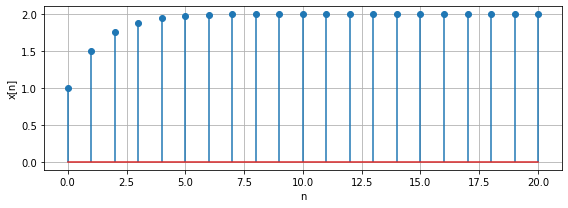

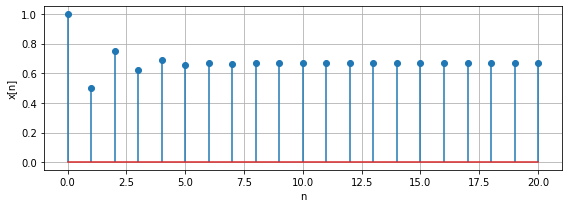

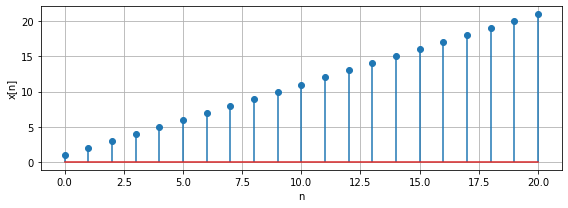

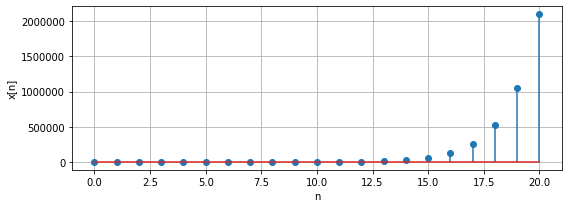

In [46]:
def ejercicio3(a=0.):
    n_range = np.arange(0.,21)
    x = np.cumsum(a**n_range)
    plot_discrete_simple(n_range,x,figsize=(8,3))
    
ejercicio3(a=0.5)
ejercicio3(a=-0.5)
ejercicio3(a=1.)
ejercicio3(a=2)

### 4. Dado un pulso rectangular discreto $x[n]$, de ancho $N$ y amplitud $A$, expresarlo como una combinación de dos funciones escalón. Grafique el pulso en el rango $-2N \leq n \leq 2N$.

Definiendo a $u[n]$ como

$$
u[n] = \begin{cases}
0 & \mbox{si}\; n < 0 \\
1 & \mbox{en otro caso}
\end{cases}
$$

se tiene que

$$
x[n] = A (u[n - n_0] - u[n - n_0 - N])
$$

es un pulso rectangular de amplitud $A$, ancho $N$ que comienza en $n_0$.

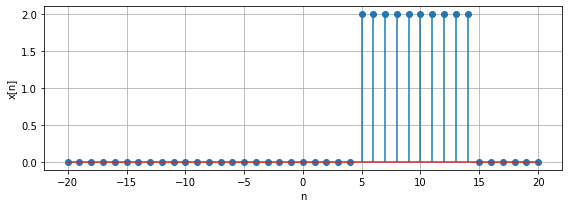

In [50]:
def discrete_pulse(n_range,N,A,n0):
    return A * (discrete_step(n_range-n0) - discrete_step(n_range - N - n0))

N, A, n0 = 10, 2, 5
n_range = np.arange(-2*N,2*N+1)
pulse = discrete_pulse(n_range,N,A,n0)
plot_discrete_simple(n_range,pulse,figsize=(8,3))

### 5. Para la señal $x(t)$ determinar $x(3t/2 + 1)$, $x(-2t-1)$, $x(t/2 - 1/2)$ 

$$
x(t) = \begin{cases}
0 & t \leq 0 \\
1 & 0 \leq t \leq 10 \\
-t/10 & 
\end{cases}
$$